In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
from folium.plugins import HeatMap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [3]:
seoul = pd.read_excel('../../data/(2010-2020)_weather.xlsx')
seoul.head(2)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2


In [4]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [5]:
# 지점 컬럼 삭제

seoul.drop('지점',axis=1,inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [ ]:
seoul.columns=['날짜','평균기온','최저기온','최고기온']
# seoul.rename(columns={"평균기온(℃)":"평균기온","최저기온(℃)":"최저기온","최고기온(℃)":"최고기온"  },inplace=True)

seoul.head(2)

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2


In [9]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [10]:
seoul.dropna(subset=['최고기온'], axis=0, inplace=True)
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 156.9 KB


In [11]:
seoul["연도"] = seoul['날짜'].dt.year
seoul['월'] = seoul['날짜'].dt.month
seoul['일'] = seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,연도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [12]:
seoul0815 = seoul[ (seoul['월']==8) & (seoul['일']==15)]
seoul0815

,날짜,평균기온,최저기온,최고기온,연도,월,일
226,2010-08-15,26.6,24.6,30.2,2010,8,15
591,2011-08-15,24.5,22.9,26.9,2011,8,15
957,2012-08-15,23.7,22.4,27.1,2012,8,15
1322,2013-08-15,28.7,25.8,32.4,2013,8,15
1687,2014-08-15,24.9,20.9,29.6,2014,8,15
2052,2015-08-15,27.1,23.1,30.8,2015,8,15
2418,2016-08-15,29.1,25.8,34.0,2016,8,15
2783,2017-08-15,21.9,20.8,24.0,2017,8,15
3148,2018-08-15,31.7,28.3,38.0,2018,8,15
3513,2019-08-15,25.9,23.9,28.6,2019,8,15


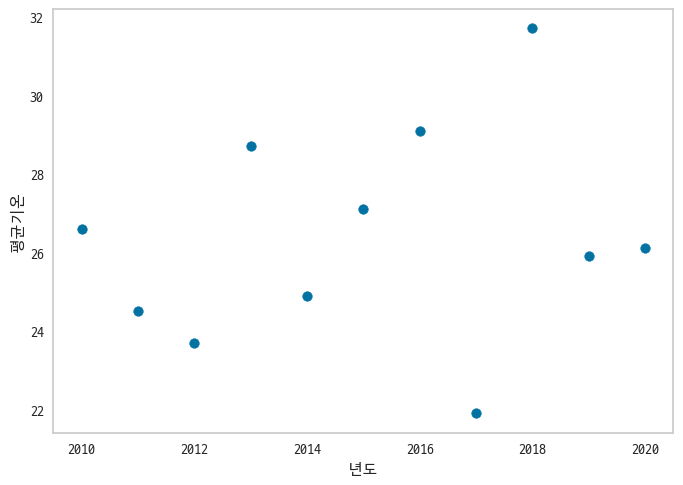

In [14]:
plt.scatter(seoul0815['연도'], seoul0815['평균기온'])
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.grid(False)
plt.show()

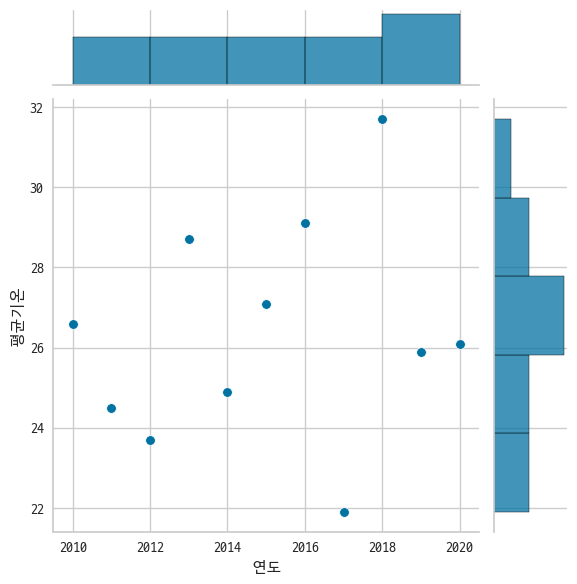

In [15]:
# jointplot 그리기
sns.jointplot(x='연도', y ='평균기온', data=seoul0815)

In [ ]:
## 선형회귀분석

model = LinearRegression()     ## 모델구축
model.fit(seoul0815[['연도']], seoul0815[['평균기온']])  ## 모델 실행

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
result = model.predict([[2025]])
result

array([[27.99090909]])

In [20]:
result = model.predict([[2026]])
result

array([[28.15181818]])

In [21]:
# 선형회귀분석 : 2026년 8월 15일 최고기온 예측

model = LinearRegression()     ## 모델구축
model.fit(seoul0815[['연도']], seoul0815[['최고기온']])  ## 모델 실행

result = model.predict([[2026]])
result

array([[30.98272727]])